In [32]:
import pandas as pd
import numpy as np
import seaborn as sns

In [33]:
df=pd.read_csv("/spam.csv", encoding='latin-1')
df

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN
...,...,...,...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...,NaN,NaN,NaN
5568,ham,Will Ì_ b going to esplanade fr home?,NaN,NaN,NaN
5569,ham,"Pity, * was in mood for that. So...any other s...",NaN,NaN,NaN
5570,ham,The guy did some bitching but I acted like i'd...,NaN,NaN,NaN


In [34]:
df.drop(columns=["Unnamed: 2", "Unnamed: 3", "Unnamed: 4"], inplace=True)
df.rename(columns={'v1': 'Result', 'v2': 'Emails'}, inplace=True)
df

,Result,Emails
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...
5568,ham,Will Ì_ b going to esplanade fr home?
5569,ham,"Pity, * was in mood for that. So...any other s..."
5570,ham,The guy did some bitching but I acted like i'd...


# New section

In [35]:
df.size

11144

In [36]:
df.shape

(5572, 2)

In [37]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Result  5572 non-null   object
 1   Emails  5572 non-null   object
dtypes: object(2)
memory usage: 87.2+ KB


In [38]:
df.describe()

,Result,Emails
count,5572,5572
unique,2,5169
top,ham,"Sorry, I'll call later"
freq,4825,30


In [39]:
df.isnull().sum()

,0
Result,0
Emails,0


In [40]:
df.duplicated().sum()

403

In [41]:
df.drop_duplicates(inplace=True)

In [42]:
df.shape

(5169, 2)

In [43]:
df["Result"].value_counts()

,count
Result,
ham,4516
spam,653


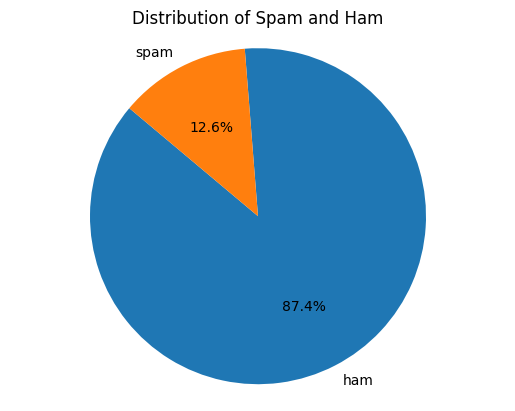

In [44]:
#Plotting of Spam and Ham distribution
import matplotlib.pyplot as plt
plt.figure()
plt.pie(df['Result'].value_counts(), labels=df['Result'].value_counts().index, autopct='%1.1f%%', startangle=140)
plt.title('Distribution of Spam and Ham')
plt.axis('equal')
plt.show()

In [45]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
df['Result'] = encoder.fit_transform(df['Result'])
df.head()

,Result,Emails
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [46]:
#Data Preprocessing
import nltk
nltk.download('stopwords')
nltk.download('punkt')
import string
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from nltk.tokenize import sent_tokenize, word_tokenize
import re

df['transform_text'] = df['Emails'].str.lower()
# Tokenization
df['transform_text'] = df['transform_text'].apply(word_tokenize)

# Removing special characters
df['transform_text'] = df['transform_text'].apply(lambda x: [re.sub(r'[^a-zA-Z0-9\s]', '', word) for word in x])

# Removing stop words and punctuation
stop_words = set(stopwords.words('english'))
df['transform_text'] = df['transform_text'].apply(lambda x: [word for word in x if word not in stop_words and word not in string.punctuation])

# Stemming
ps = PorterStemmer()
df['transform_text'] = df['transform_text'].apply(lambda x: [ps.stem(word) for word in x])

# Convert the preprocessed text back to string
df['transform_text'] = df['transform_text'].apply(lambda x: ' '.join(x))

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [47]:
#Vectorization
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf = TfidfVectorizer(max_features=3000)
X = tfidf.fit_transform(df['Emails']).toarray()
Y = df['Result']

In [48]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

In [ ]:
#SVM
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score,confusion_matrix,precision_score
svc_classifier = SVC()
svc_classifier.fit(x_train, y_train)
y_pred_svc = svc_classifier.predict(x_test)
accuracy_svc = accuracy_score(y_test, y_pred_svc)
print(f"SVM Accuracy: {accuracy_svc:.2f}")
print("confusion Matrix :",confusion_matrix(y_test,y_pred_svc))

In [ ]:
#Random Forest
from sklearn.ensemble import RandomForestClassifier
rf_classifier = RandomForestClassifier()
rf_classifier.fit(x_train, y_train)
y_pred_rf = rf_classifier.predict(x_test)
accuracy_rf = accuracy_score(y_test, y_pred_rf)
print(f"Random Forest Accuracy: {accuracy_rf:.2f}")
print("confusion Matrix :",confusion_matrix(y_test,y_pred_rf))

In [ ]:
#Naive Bayes
from sklearn.naive_bayes import MultinomialNB
nb_classifier = MultinomialNB()
nb_classifier.fit(x_train, y_train)
y_pred_nb = nb_classifier.predict(x_test)
accuracy_nb = accuracy_score(y_test, y_pred_nb)
print(f"Naive Bayes Accuracy: {accuracy_nb:.2f}")
print("confusion Matrix :",confusion_matrix(y_test,y_pred_nb))

In [ ]:
# Model Comparison
models = ['SVM', 'Random Forest', 'Naive Bayes']
accuracies = [accuracy_svc*100, accuracy_rf*100, accuracy_nb*100]
plt.bar(models, accuracies)
plt.xlabel("Models")
plt.ylabel("Accuracy")
plt.title("Model Comparison - Accuracy")
plt.show()

In [ ]:
#Predict with new data
input_mail ="Congratulations! You've won a prize!"
input_data_features = tfidf.transform([input_mail])
input_data_features_dense = input_data_features.toarray()
svm_predictions = svc_classifier.predict(input_data_features_dense)
if svm_predictions == 1:
    print("Spam Mail")
else:
    print("Ham Mail")

In [ ]:
input_mail ="Reminder: Meeting at 2 PM tomorrow."
input_data_features = tfidf.transform([input_mail])
input_data_features_dense = input_data_features.toarray()
svm_predictions = svc_classifier.predict(input_data_features_dense)
if svm_predictions == 1:
    print("Spam Mail")
else:
    print("Ham Mail")